A great source of experimental data showing the problem is Einstein's [Original work](https://onlinelibrary.wiley.com/doi/abs/10.1002/andp.200590013), and Steve's book reproduces the plot from Einstein. (See also the [English translation](https://einsteinpapers.press.princeton.edu/vol2-trans/228)) Unfortunately that plot belongs to the current publisher of Annalen der Physik and cannot be republished under a free license. So in order to provide this data in the lecture notes and to make it available to whoever wants, I decided to take the original data Einstein has and repeat the exercise. Because we are living in an enlightened age, I also wanted to see if the more advanced Debye model would be any better for Einstein's data.

Here's the source table from Einstein's work. (By the way, find a typo ;)








![Title](einstein_data.png)

Let's analyse it!

In [34]:
from matplotlib import pyplot
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad

pyplot.rcParams['figure.figsize'] = (10, 7)
pyplot.rcParams['font.size'] = 20

Take the data from Einstein's table.

In [37]:
T =[222.4, 262.4, 283.7, 306.4, 331.3, 358.5, 413.0, 479.2, 520.0, 879.7, 1079.7, 1258.0]

In [38]:
c = [0.762, 1.146, 1.354, 1.582, 1.838, 2.118, 2.661, 3.28, 3.631, 5.29, 5.387, 5.507]

## Deviation from the Dulong–Petit law

The simplest theory of heat capacity of solids is the Dulong–Petit law saying that each atom has 6 degrees of freedom (3x kinetic and 3x potential), and therefore heat capacity per atom is  C=6×1/2=3
  (in units of Boltzmann constant). Afterwards experiments observed that at low temperatures the [Dulong–Petit law](https://en.wikipedia.org/wiki/Dulong–Petit_law) breaks down and heat capacity drops.

Einstein was measuring heat capacities in gram-calories; we start by translating it into natural units and plotting the original data.

Just like Einstein in his time we see something very different from a temperature-independent heat capacity.

In [39]:
c=np.multiply(c,3 / 5.96)

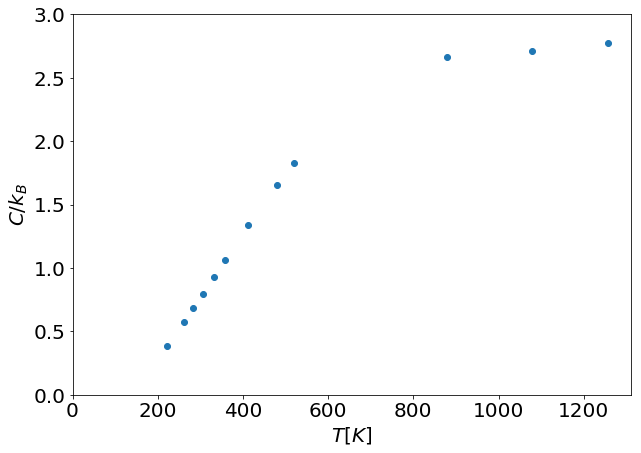

In [40]:
def plot_data():
    pyplot.scatter(T, c)
    pyplot.xlim(xmin=0)
    pyplot.ylim(0, 3)
    pyplot.xlabel('$T [K]$')
    pyplot.ylabel('$C/k_B$')

plot_data()

## Einstein solid (fitting the data)

Einstein (Steve explains that Einstein was a pretty smart guy in his book) came up with an idea to model each atom as a quantum harmonic oscillator ([Einstein solid](https://en.wikipedia.org/wiki/Einstein_solid)), which explained the heat capacity reduction using the quantum mechanics (which didn't exist yet).

Einstein's model predicted the following law:

$C_V = (T_E/T)^2 \frac{e^{T_E/T}}{(e^{T_E/T}-1)^2}$

with the temperature scale  $T_E=ℏω/kB$
  a model parameter.

Having the data and the model, we just perform the fit and get the temperature scale of the einstein solid as a result.

T_E = 1302.2 ± 13.9 K


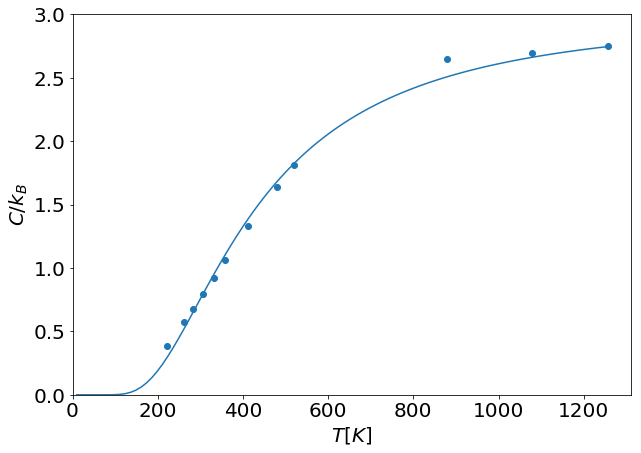

In [30]:
def c_einstein(T, T_E):
    x = T_E / T
    return 3 * x**2 * np.exp(x) / (np.exp(x) - 1)**2

fit = curve_fit(c_einstein, T, c, 1000)
T_E = fit[0][0]
delta_T_E = np.sqrt(fit[1][0, 0])
print(f"T_E = {T_E:.5} ± {delta_T_E:.3} K")

plot_data()
temps = np.linspace(10, T[-1], 100)
pyplot.plot(temps, c_einstein(temps, T_E));

![Title](einstein_figure.png)

Curiously, Einstein's original curve looks visibly different.

The resolution to the mystery is rather simple: Einstein didn't make an actual fit, he just matched a single point!

Quoting from his work:

"For T = 331.3 we have c = 1.838; according to the theory described, from this it follows that A = 11.0μ."


And indeed, it's easy to find the very point Einstein used to perform the "fit", and where the curve intersects with the data. Those were simple times :)

## Debye model 

Einstein's model was still not good enough and Debye improved it by considering heat capacity of sound waves with a linear dispersion.

As one last fun exercise we will check if the more advanced Debye model explains the data better.

The Debye heat capacity is

$C_V =9(T_D/T)^3 \int_0^{T_D/T} \frac{x^4 e^x}{(e^x-1)^2}dx$

T_D = 1798.7 ± 25.4 K


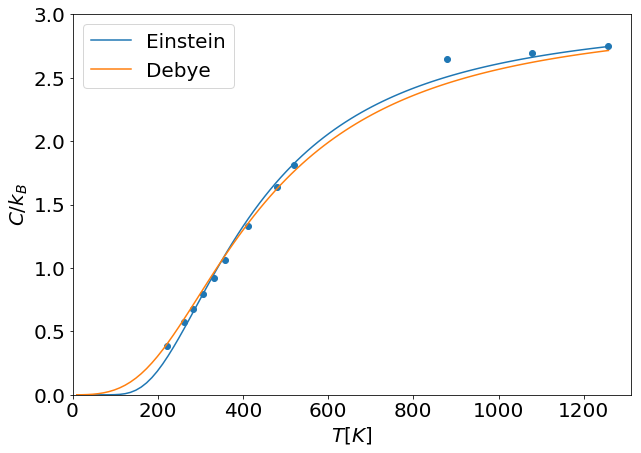

In [31]:
def integrand(y):
    return y**4 * np.exp(y) / (np.exp(y) - 1)**2

@np.vectorize
def c_debye(T, T_D):
    x = T / T_D
    return 9 * x**3 * quad(integrand, 0, 1/x)[0]

fit = curve_fit(c_debye, T, c, 1000)
T_D = fit[0][0]
delta_T_D = np.sqrt(fit[1][0, 0])
print(f"T_D = {T_D:.5} ± {delta_T_D:.3} K")

plot_data()
pyplot.plot(temps, c_einstein(temps, T_E), label='Einstein')
pyplot.plot(temps, c_debye(temps, T_D), label='Debye')
pyplot.legend();

So with the data Einstein used one couldn't really tell the difference.

## Summary

We took a table from Einstein's paper, processed it, plotted, and improved on Einstein's work by making an actual least squares fit.